In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("cancer_wiscosin.csv")

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Preparando a entrada

In [3]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
X = data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

In [5]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
type(X)

pandas.core.frame.DataFrame

In [7]:
X = X.to_numpy()

In [8]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [9]:
type(X)

numpy.ndarray

In [10]:
X[1]

array([2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
       8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
       3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
       1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
       1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02])

## Preparando a saída

In [11]:
y = data['diagnosis'].tolist()

y1 = []

for i in y:
    if i == "M":
        y1.append(1)
    if i == "B":
        y1.append(0)
        
Y = np.empty([569, 1], dtype = int)

for i in range(569):
    Y[i] = y1[i]
    
print(Y)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]


## Separando em treinamento e teste

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Preparando os pesos inciais

In [17]:
pesos_0 = 2 * np.random.random((30, 5)) - 1
pesos_1 = 2 * np.random.random((5 , 1)) - 1

In [18]:
print(pesos_1)

[[-0.22697093]
 [ 0.1515125 ]
 [-0.36123512]
 [-0.71023884]
 [ 0.85202578]]


## MLP

In [15]:
def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

def DerivadaSigmoid(x):
    return x * (1 - x)

In [19]:
epochs = 100000
taxa_aprendizagem = 0.5
momentum = 1

for i in range(epochs):
    
    # forward-pass
    activation_camada_oculta = Sigmoid(np.dot(X_train, pesos_0))
    
    activation_camada_saida = Sigmoid(np.dot(activation_camada_oculta, pesos_1))
    
    erro = Y_train - activation_camada_saida
    print("erro médio: ", np.mean(np.abs(erro)))
    
    # backward-pass
    delta_saida = erro * DerivadaSigmoid(activation_camada_saida)
    
    delta_oculta = np.dot(delta_saida, pesos_1.T) * DerivadaSigmoid(activation_camada_oculta)
    
    pesos_1 = (pesos_1 * momentum) + (np.dot(activation_camada_oculta.T, delta_saida) * taxa_aprendizagem)
    
    pesos_0 = (pesos_0 * momentum) + (np.dot(X_train.T, delta_oculta) * taxa_aprendizagem)

erro médio:  0.5222492983278986
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio:  0.36263736263736285
erro médio

KeyboardInterrupt: 

## Visualização para selecionar melhores features

In [21]:
import seaborn as sns

In [28]:
data_mean = data.drop(["id", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", 
               "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", 
               "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", 
               "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst", "Unnamed: 32"], axis = 1)
data_mean.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


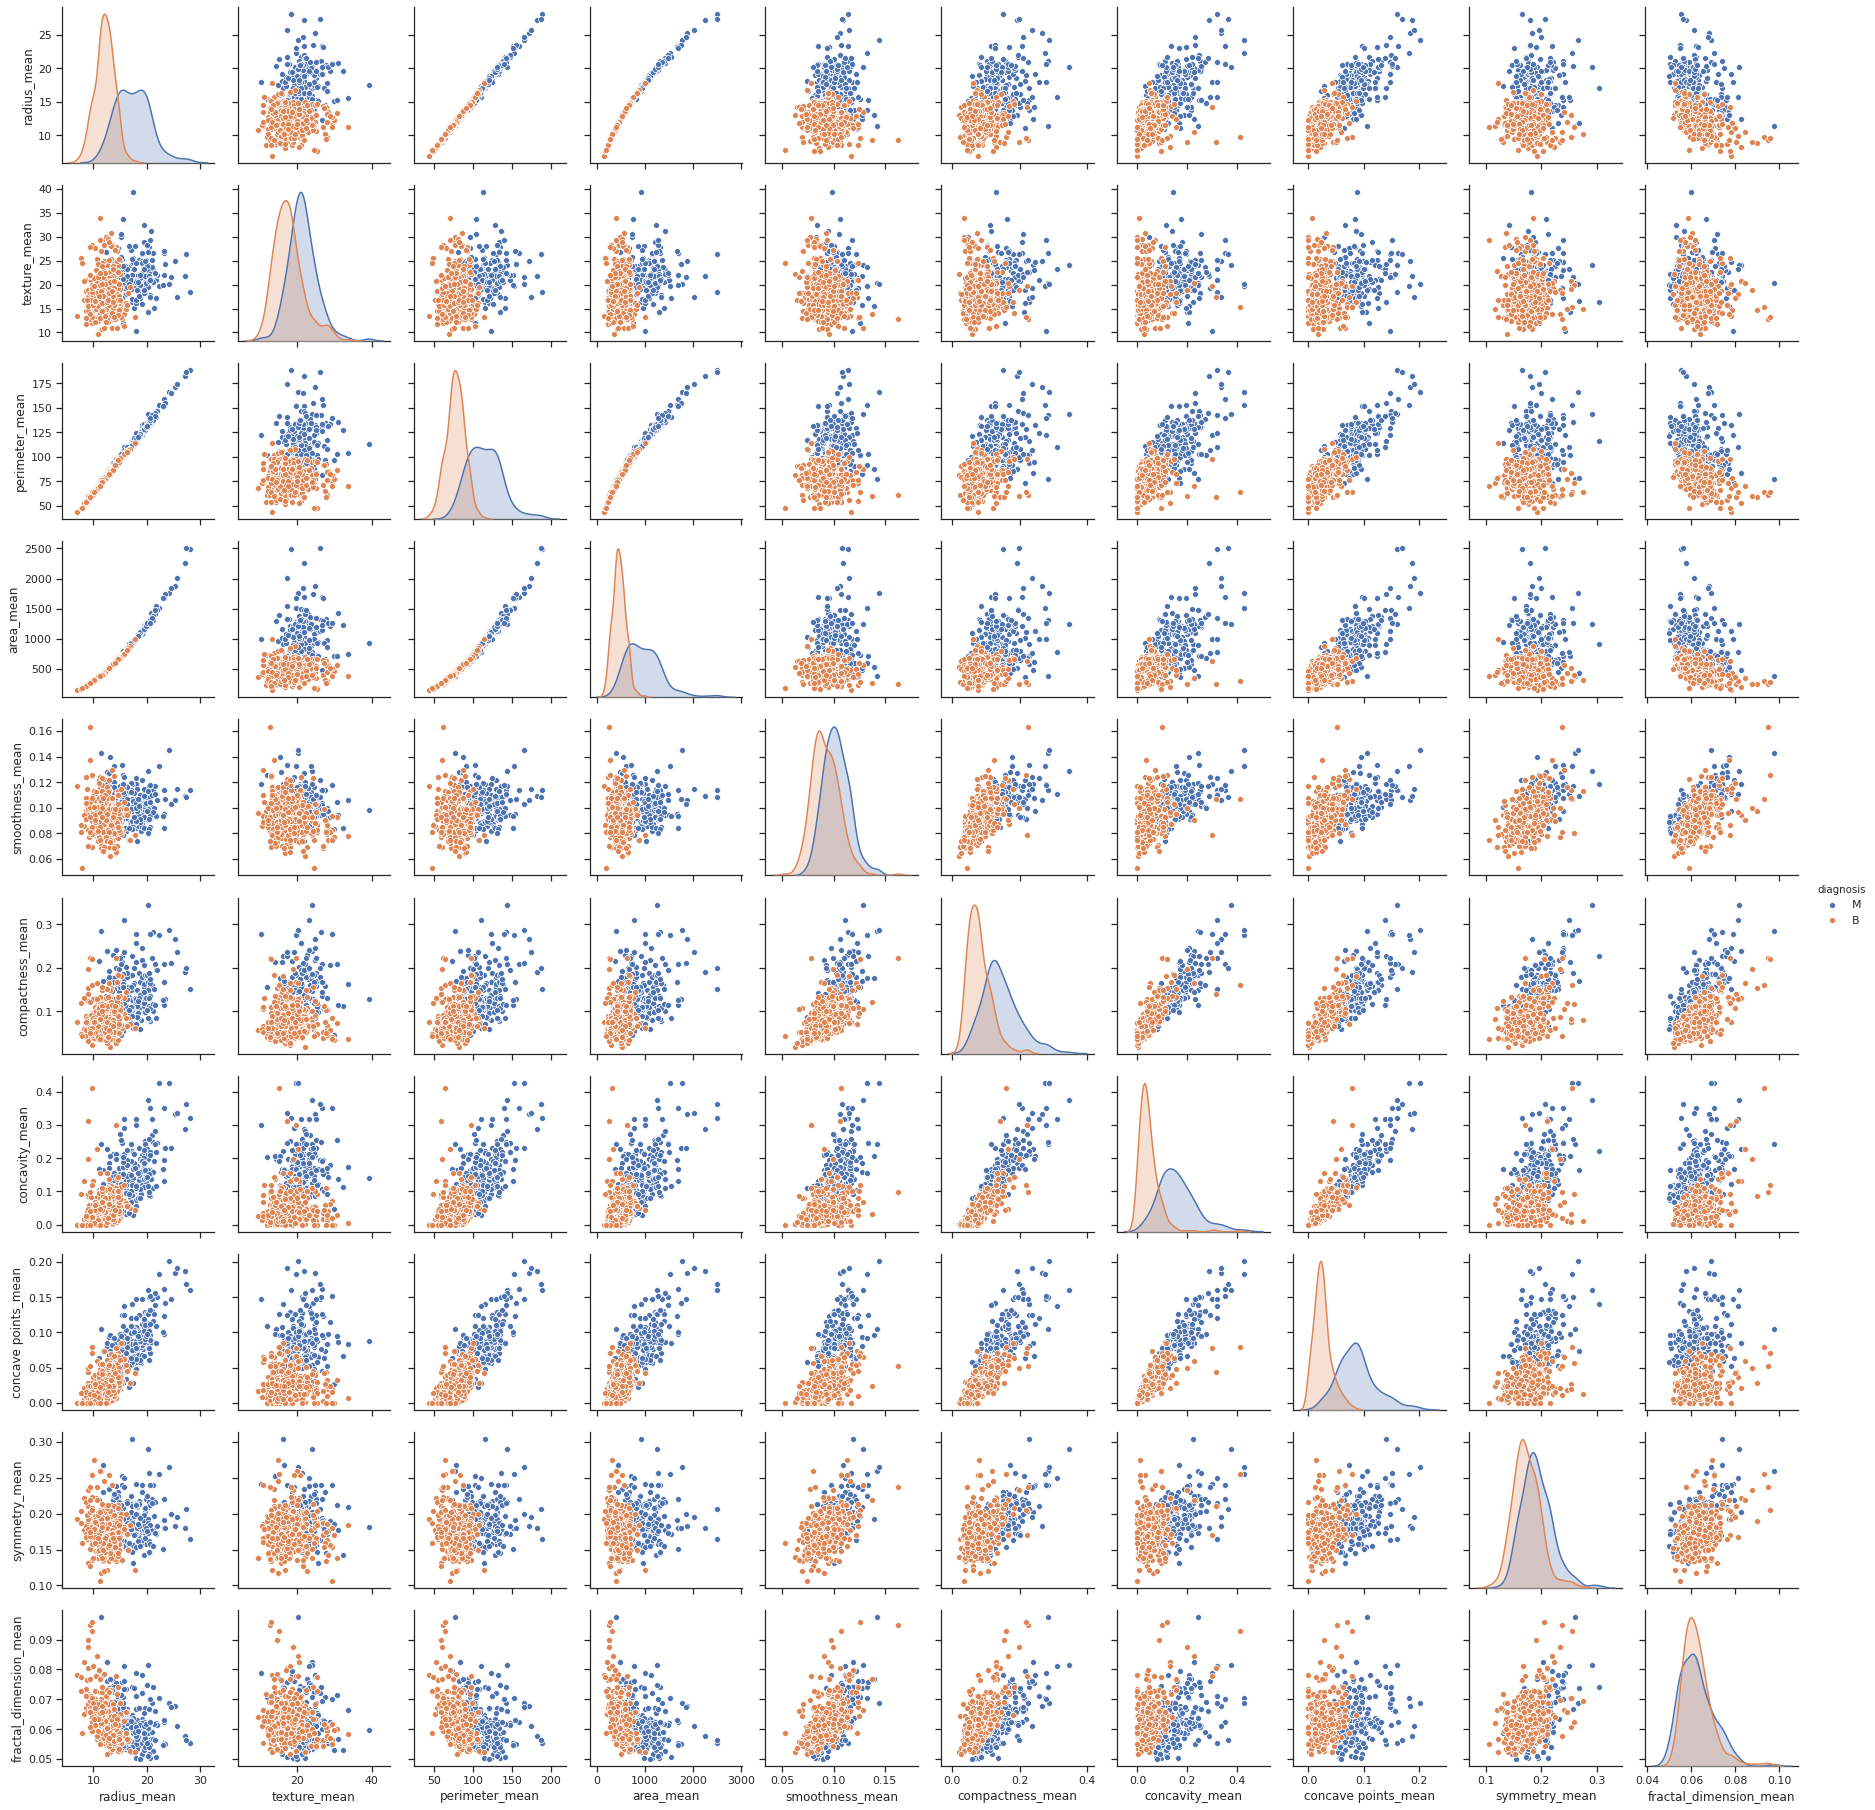

In [30]:
sns.set(style = "ticks")
sns.pairplot(data_mean, hue = "diagnosis")

## Utilizando features selecionadas

In [72]:
X_2 = data[['perimeter_mean', 'concavity_mean', "radius_worst"]]

In [73]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y, test_size = 0.2, random_state = 0)

In [77]:
#pesos_0 = 2 * np.random.random((3, 4)) - 1
#pesos_1 = 2 * np.random.random((4, 1)) - 1

epochs = 100000
taxa_aprendizagem = 0.3
momentum = 1

for i in range(epochs):
    
    # forward-pass
    activation_camada_oculta = Sigmoid(np.dot(X_train_2, pesos_0))
    
    activation_camada_saida = Sigmoid(np.dot(activation_camada_oculta, pesos_1))
    
    erro = Y_train_2 - activation_camada_saida
    print("erro médio: ", np.mean(np.abs(erro)))
    
    # backward-pass
    delta_saida = erro * DerivadaSigmoid(activation_camada_saida)
    
    delta_oculta = np.dot(delta_saida, pesos_1.T) * DerivadaSigmoid(activation_camada_oculta)
    
    pesos_1 = (pesos_1 * momentum) + (np.dot(activation_camada_oculta.T, delta_saida) * taxa_aprendizagem)
    
    pesos_0 = (pesos_0 * momentum) + (np.dot(X_train_2.T, delta_oculta) * taxa_aprendizagem)


erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232

erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.3676042

erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.4150973

erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766

erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.4150973

erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.3738205

erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.3676042

erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.4150973

erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.3738205

erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766

erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.4150973

erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766

erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.4150973

erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232

erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.3738205

erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.4150973

erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.4150973

erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232

erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232

erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.3738205

erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.3738205

erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766

erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766

erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232

erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.4150973

erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766

erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.3676042

erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.4150973

erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.4150973

erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766

erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766

erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232

erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.3676042

erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.3676042

erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.3738205

erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766

erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232

erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.3738205

erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766

erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.3738205

erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766

erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766

erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.3676042

erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766

erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.4150973

erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.3676042

erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.4150973

erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.36760421559319156
erro médio:  0.37382053828999207
erro médio:  0.41509737860141277
erro médio:  0.6093766690991146
erro médio:  0.3656232605353889
erro médio:  0.3676042

KeyboardInterrupt: 

In [75]:
pesos_0

array([[ 0.92979435, -0.85589232, -0.68854376, -0.75557071],
       [ 0.90644312, -0.90878247,  0.17859402, -0.01557045],
       [ 0.44896827, -0.79929146, -0.593749  , -0.30600439]])

In [76]:
pesos_1

array([[-4.51094293],
       [-0.65245766],
       [-0.72743019],
       [ 0.65158791]])

## Outros plots

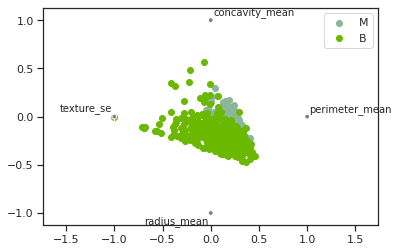

In [81]:
plot_test = data[["diagnosis", 'perimeter_mean', 'concavity_mean', "texture_se", "radius_mean" ]]

pd.plotting.radviz(plot_test, "diagnosis")